# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

# 0. Setup

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

# 1. Generate the Cities List by Using the `citipy` Library

In [10]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 592


---

# 2. Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### 2.1 Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [11]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []
unit = "metric"

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=" + unit
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tasiilaq
Processing Record 2 of Set 1 | provideniya
Processing Record 3 of Set 1 | nago
Processing Record 4 of Set 1 | puerto ayora
Processing Record 5 of Set 1 | tezu
Processing Record 6 of Set 1 | mataura
Processing Record 7 of Set 1 | vaini
Processing Record 8 of Set 1 | tuatapere
Processing Record 9 of Set 1 | port alfred
Processing Record 10 of Set 1 | tiksi
Processing Record 11 of Set 1 | victoria
Processing Record 12 of Set 1 | arraial do cabo
Processing Record 13 of Set 1 | kodiak
Processing Record 14 of Set 1 | taman
Processing Record 15 of Set 1 | richards bay
Processing Record 16 of Set 1 | mehamn
Processing Record 17 of Set 1 | carnarvon
Processing Record 18 of Set 1 | pacifica
Processing Record 19 of Set 1 | dikson
Processing Record 20 of Set 1 | rikitea
Processing Record 21 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 22 of Set 1 | ushuaia
Processing Rec

Processing Record 37 of Set 4 | padang
Processing Record 38 of Set 4 | acajutla
Processing Record 39 of Set 4 | baiao
Processing Record 40 of Set 4 | sentyabrskiy
City not found. Skipping...
Processing Record 41 of Set 4 | narsaq
Processing Record 42 of Set 4 | srednekolymsk
Processing Record 43 of Set 4 | kenai
Processing Record 44 of Set 4 | tsihombe
City not found. Skipping...
Processing Record 45 of Set 4 | matay
Processing Record 46 of Set 4 | mednogorsk
Processing Record 47 of Set 4 | nuuk
Processing Record 48 of Set 4 | saint anthony
Processing Record 49 of Set 4 | arlit
Processing Record 0 of Set 5 | nikolskoye
Processing Record 1 of Set 5 | mizdah
Processing Record 2 of Set 5 | veraval
Processing Record 3 of Set 5 | guerrero negro
Processing Record 4 of Set 5 | ribeira grande
Processing Record 5 of Set 5 | marsh harbour
Processing Record 6 of Set 5 | halalo
City not found. Skipping...
Processing Record 7 of Set 5 | myatlevo
Processing Record 8 of Set 5 | roswell
Processing Rec

Processing Record 27 of Set 8 | wattegama
Processing Record 28 of Set 8 | mount gambier
Processing Record 29 of Set 8 | oromocto
Processing Record 30 of Set 8 | ugoofaaru
Processing Record 31 of Set 8 | stoyba
City not found. Skipping...
Processing Record 32 of Set 8 | staraya russa
Processing Record 33 of Set 8 | torbay
Processing Record 34 of Set 8 | novyy urengoy
Processing Record 35 of Set 8 | almaznyy
Processing Record 36 of Set 8 | makarov
Processing Record 37 of Set 8 | duvan
Processing Record 38 of Set 8 | port hedland
Processing Record 39 of Set 8 | emerald
Processing Record 40 of Set 8 | praia da vitoria
Processing Record 41 of Set 8 | pacific grove
Processing Record 42 of Set 8 | te anau
Processing Record 43 of Set 8 | mounana
Processing Record 44 of Set 8 | half moon bay
Processing Record 45 of Set 8 | outjo
Processing Record 46 of Set 8 | tommot
Processing Record 47 of Set 8 | baykit
Processing Record 48 of Set 8 | farafangana
Processing Record 49 of Set 8 | louisbourg
Cit

Processing Record 12 of Set 12 | makakilo city
Processing Record 13 of Set 12 | hunza
City not found. Skipping...
Processing Record 14 of Set 12 | narok
Processing Record 15 of Set 12 | huarmey
Processing Record 16 of Set 12 | bubaque
Processing Record 17 of Set 12 | flinders
Processing Record 18 of Set 12 | kortkeros
Processing Record 19 of Set 12 | huilong
Processing Record 20 of Set 12 | dubbo
Processing Record 21 of Set 12 | talara
Processing Record 22 of Set 12 | esmeraldas
Processing Record 23 of Set 12 | blackwater
Processing Record 24 of Set 12 | groningen
Processing Record 25 of Set 12 | archidona
Processing Record 26 of Set 12 | sioux lookout
Processing Record 27 of Set 12 | thunder bay
Processing Record 28 of Set 12 | kotovo
Processing Record 29 of Set 12 | khonuu
City not found. Skipping...
Processing Record 30 of Set 12 | naze
Processing Record 31 of Set 12 | oktyabrskiy
Processing Record 32 of Set 12 | pevek
Processing Record 33 of Set 12 | nelson bay
Processing Record 34

### 2.2 Convert to DataFrame

In [12]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          542
Lat           542
Lng           542
Max Temp      542
Humidity      542
Cloudiness    542
Wind Speed    542
Country       542
Date          542
dtype: int64

In [13]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tasiilaq,65.6145,-37.6368,-3.91,81,100,2.66,GL,1675369964
1,provideniya,64.3833,-173.3000,-13.03,93,39,5.32,RU,1675369964
2,nago,26.5881,127.9761,10.24,72,0,3.07,JP,1675369964
3,puerto ayora,-0.7393,-90.3518,29.98,87,100,4.47,EC,1675369965
4,tezu,27.9167,96.1667,16.20,18,0,2.01,IN,1675369965


### 2.3 Export to .csv

In [14]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities_jl.csv", index_label="City_ID")

### 2.4 Read in .csv

In [3]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities_jl.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tasiilaq,65.6145,-37.6368,-3.91,81,100,2.66,GL,1675369964
1,provideniya,64.3833,-173.3000,-13.03,93,39,5.32,RU,1675369964
2,nago,26.5881,127.9761,10.24,72,0,3.07,JP,1675369964
3,puerto ayora,-0.7393,-90.3518,29.98,87,100,4.47,EC,1675369965
4,tezu,27.9167,96.1667,16.20,18,0,2.01,IN,1675369965


In [3]:
city_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 542 entries, 0 to 541
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        542 non-null    object 
 1   Lat         542 non-null    float64
 2   Lng         542 non-null    float64
 3   Max Temp    542 non-null    float64
 4   Humidity    542 non-null    int64  
 5   Cloudiness  542 non-null    int64  
 6   Wind Speed  542 non-null    float64
 7   Country     537 non-null    object 
 8   Date        542 non-null    int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 42.3+ KB


# 3. Create the Scatter Plots Requested

### 3.1 Latitude Vs. Temperature

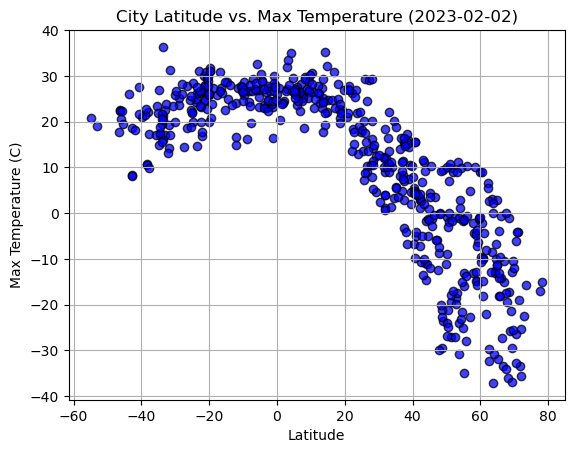

In [4]:
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker="o", facecolors="blue", edgecolors="black",
            alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Latitude vs. Max Temperature (2023-02-02)")
plt.grid()

plt.savefig("../output_data/Fig1_jl.png")

plt.show()

### 3.2 Latitude Vs. Humidity

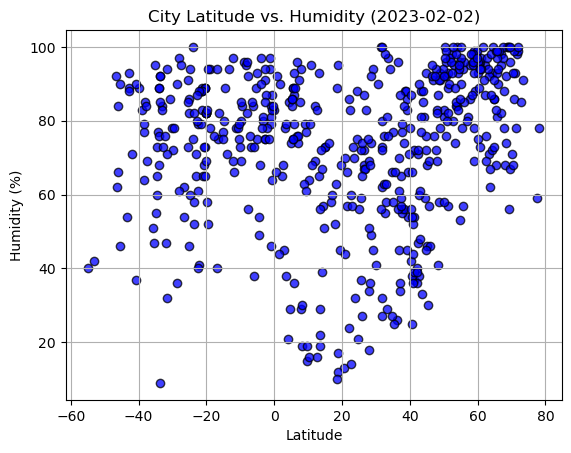

In [5]:
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker="o", facecolors="blue", edgecolors="black",
            alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (2023-02-02)")
plt.grid()

plt.savefig("../output_data/Fig2_jl.png")

plt.show()

### 3.3 Latitude Vs. Cloudiness

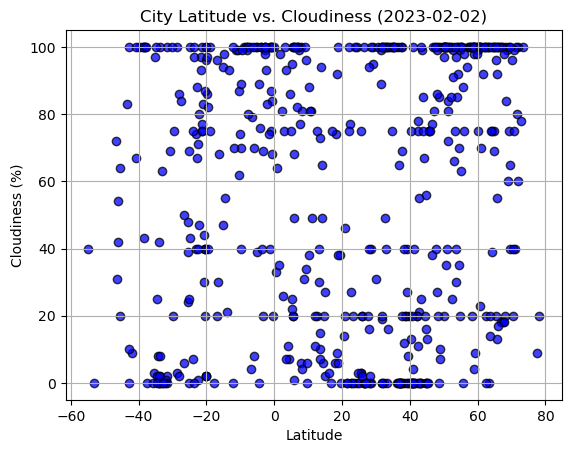

In [6]:
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker="o", facecolors="blue", edgecolors="black",
            alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (2023-02-02)")
plt.grid()

plt.savefig("../output_data/Fig3_jl.png")

plt.show()

### 3.4 Latitude vs. Wind Speed Plot

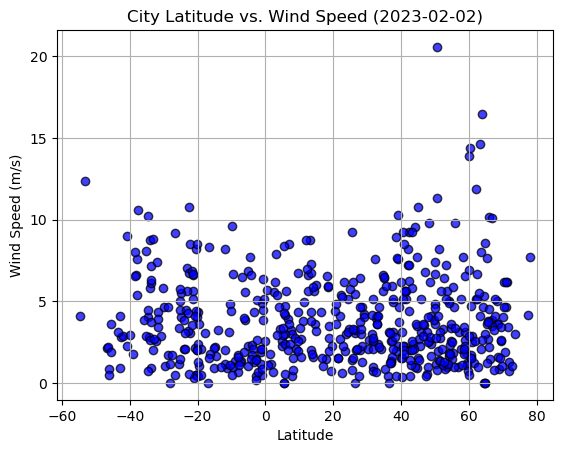

In [7]:
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker="o", facecolors="blue", edgecolors="black",
            alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (2023-02-02)")
plt.grid()

plt.savefig("../output_data/Fig4_jl.png")

plt.show()

---

# 4. Requirement 2: Compute Linear Regression for Each Relationship


### 4.1 Set Up

In [4]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tasiilaq,65.6145,-37.6368,-3.91,81,100,2.66,GL,1675369964
1,provideniya,64.3833,-173.3000,-13.03,93,39,5.32,RU,1675369964
2,nago,26.5881,127.9761,10.24,72,0,3.07,JP,1675369964
4,tezu,27.9167,96.1667,16.20,18,0,2.01,IN,1675369965
9,tiksi,71.6872,128.8694,-33.38,98,80,3.45,RU,1675369967


In [5]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,puerto ayora,-0.7393,-90.3518,29.98,87,100,4.47,EC,1675369965
5,mataura,-46.1927,168.8643,22.58,66,42,0.86,NZ,1675369965
6,vaini,-21.2000,-175.2000,27.09,89,75,5.66,TO,1675369966
7,tuatapere,-46.1333,167.6833,20.62,84,54,0.50,NZ,1675369967
8,port alfred,-33.5906,26.8910,21.21,92,2,0.89,ZA,1675369708


In [50]:
def regression_line(x_values, y_values, y_name):
    
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
    #source:https://stackoverflow.com/questions/485789/why-do-i-get-typeerror-cant-multiply-sequence-by-non-int-of-type-float
    regress_values = x_values * slope + intercept

    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
    plt.scatter(x_values, y_values, marker="o", facecolors="blue", edgecolors="black",
            alpha=0.75)
    plt.plot(x_values,regress_values,"r-")
    
    plt.xlabel("Latitude")
    plt.ylabel(y_name)
    x_mean = x_values.mean()
    y_mean = y_values.mean()
    plt.annotate(line_eq,(x_mean,y_mean),fontsize=15,color="red")
    print(f"The r-value is: {rvalue**2}")

    plt.show()

### 4.2  Temperature vs. Latitude Linear Regression Plot

#### Nothern Hemisphere

The r-value is: 0.7224736133590939


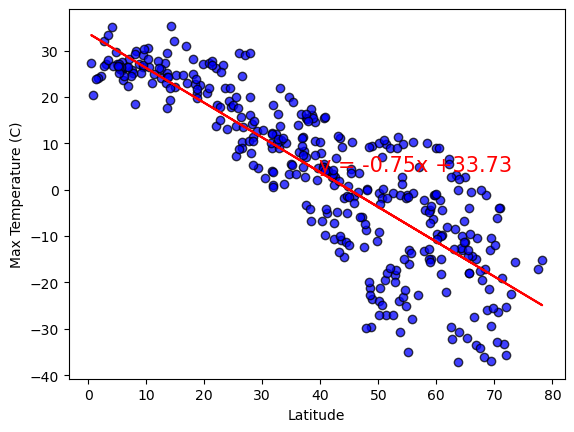

In [51]:
x_axis = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Max Temp']
y_name = "Max Temperature (C)"

regression_line(x_axis, y_axis, y_name)

#### Southern Hemisphere

The r-value is: 0.21359106060984126


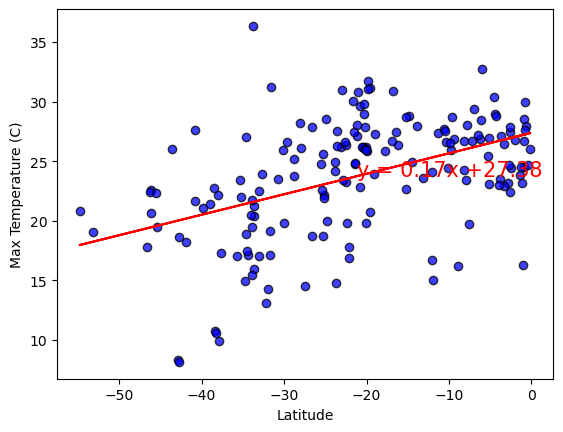

In [52]:
x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Max Temp']
y_name = "Max Temperature (C)"

regression_line(x_axis, y_axis, y_name)

**Discussion about the linear relationship:** Compared to the Southern Hemishphere, the temperatrue decreases at a more rapid rate as you move further away from the equator in the Northern Hemisphere.

### 4.3 Humidity vs. Latitude Linear Regression Plot

#### Nothern Hemisphere

The r-value is: 0.1890925995233316


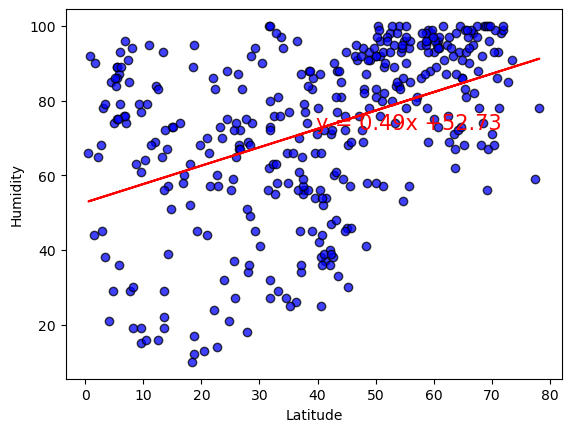

In [53]:
x_axis = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Humidity']
y_name = "Humidity"

regression_line(x_axis, y_axis, y_name)

#### Southern Hemisphere

The r-value is: 0.04109013477044145


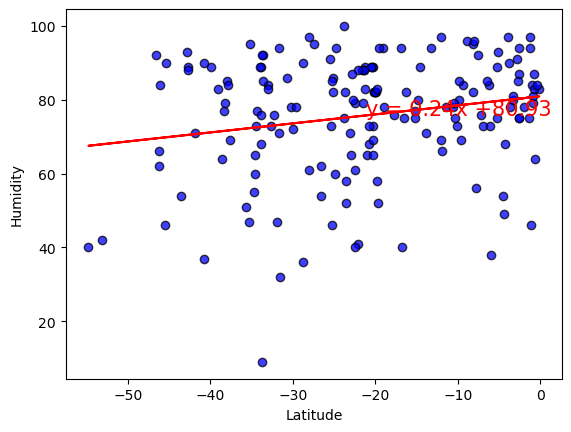

In [54]:
x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Humidity']
y_name = "Humidity"

regression_line(x_axis, y_axis, y_name)

**Discussion about the linear relationship:** Although still extremely weak, there is a stronger correlation between latitude and humidity in the Northern Hemisphere compared to the Southern Hemisphere.

### 4.4 Cloudiness vs. Latitude Linear Regression Plot

#### Northern Hemisphere

The r-value is: 0.05847612752116635


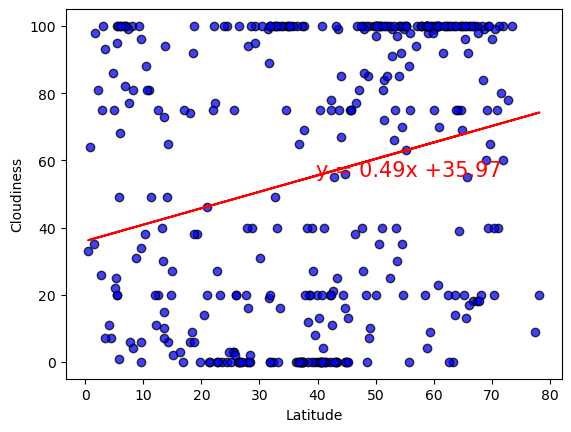

In [55]:
x_axis = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Cloudiness']
y_name = "Cloudiness"

regression_line(x_axis, y_axis, y_name)

#### Southern Hemisphere

The r-value is: 0.11928963283245839


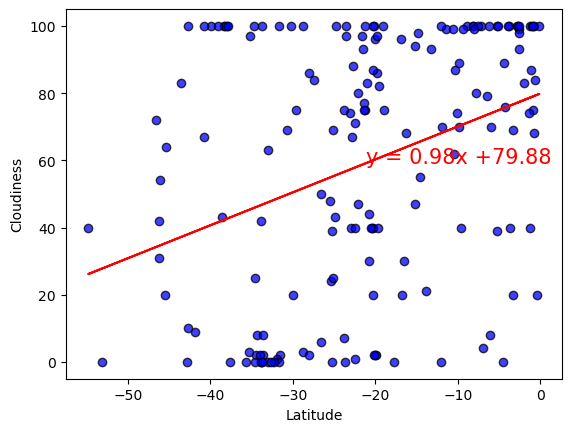

In [56]:
x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Cloudiness']
y_name = "Cloudiness"

regression_line(x_axis, y_axis, y_name)

**Discussion about the linear relationship:** There is no correlation between latitude and cloudiness in either hemisphere.

### 4.5 Wind Speed vs. Latitude Linear Regression Plot

#### Northern Hemisphere

The r-value is: 0.003050093104601215


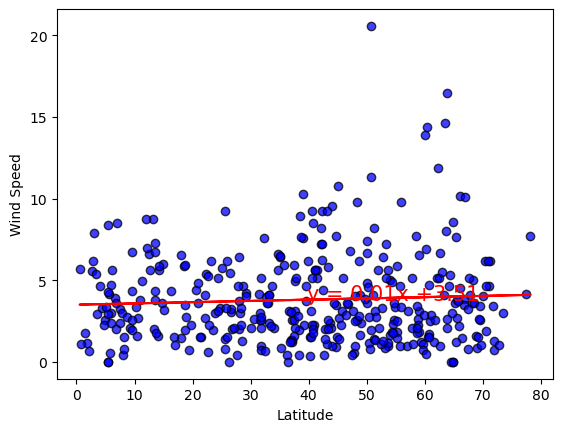

In [57]:
x_axis = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Wind Speed']
y_name = "Wind Speed"

regression_line(x_axis, y_axis, y_name)

#### Southern Hemisphere

The r-value is: 0.05252041270959228


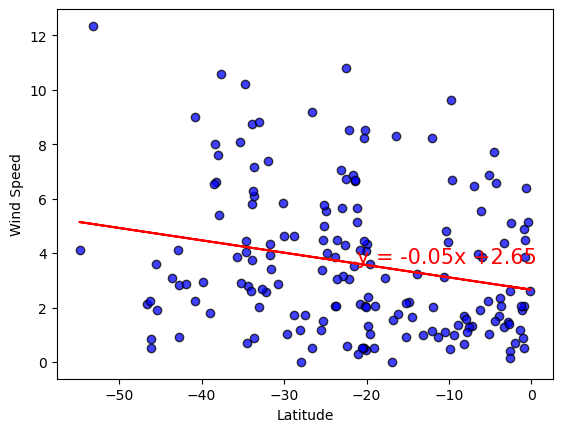

In [58]:
x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Wind Speed']
y_name = "Wind Speed"

regression_line(x_axis, y_axis, y_name)

**Discussion about the linear relationship:** In the Northern Hemisphere, the wind speed is relatively consistent across the differetn latitudes. In the Southern Hemisphere, there appears to be a very slight increase in wind speed as you move further away from the equator, but there is no correlation. 